In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/harga-rumah/harga_rumah.csv


* Machine learning ini dibuat menggunakan algoritma K-Nearest Neighbors (KNN)
* Program ini menyajikan machine learning yang digunakan untuk memprediksi harga rumah

**Import library**

In [2]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
#pandas dan numpy done

**Load data**

In [3]:
data_location = '../input/harga-rumah/harga_rumah.csv'
row_data = pd.read_csv(data_location)
row_data.shape

(545, 4)

In [4]:
#membaca data 5 teratas
row_data.head()

,harga,luas,kasur,km
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1


**Membersihkan data yang tidak lengkap (Jika ada)**

In [5]:
df = row_data.dropna(axis=0)
df.describe()

,harga,luas,kasur,km
count,5.450000e+02,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239
std,1.870440e+06,2170.141023,0.738064,0.502470
min,1.750000e+06,1650.000000,1.000000,1.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000


In [6]:
print(df.dtypes)

harga    int64
luas     int64
kasur    int64
km       int64
dtype: object


**Menentukan variabel independen dan dependen**

In [7]:
#Menentukan varibel independen dari data sehingga, menghapus varibel dependen yaitu harga
x = df.drop(["harga"],axis = 1)
x.head()


,luas,kasur,km
0,7420,4,2
1,8960,4,4
2,9960,3,2
3,7500,4,2
4,7420,4,1


In [8]:
#Menampilkan data varibel dependen
y = df["harga"]
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: harga, dtype: int64

**Membagi data untuk training dan validasi**

In [9]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.2, random_state = 70)

**Membangun model dengan algoritma K-Nearest Neighbors**

In [10]:
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg
from sklearn.metrics import mean_squared_error as mse

model  = KNN_Reg(n_neighbors = 1)

#training model
model.fit(train_x, train_y)
acc1 = model.score(test_x, test_y)

# test for prediction
test_predict = model.predict(test_x)
score = mse(test_predict, test_y)
print(' MSE: ', score, '\n', 'Accuracy: ', acc1)  

 MSE:  2829221676605.5044 
 Accuracy:  0.11749687984493729


**Menggunakan elbow method untuk menentukan nilai K terbaik**

In [11]:
def Elbow(K):
  #inisialisasi list kosong
  test_mse =[]

  #train model pada setiap nilai K
  for i in K:
    model = KNN_Reg(n_neighbors=i)
    model.fit(train_x, train_y)
    tmp = model.predict(test_x)
    tmp = mse(tmp, test_y)
    test_mse.append(tmp)
  
  return test_mse

**Menampilkan grafik nilai k berdasarkan MSE**

Text(0.5, 1.0, 'Elbow Curve for Test')

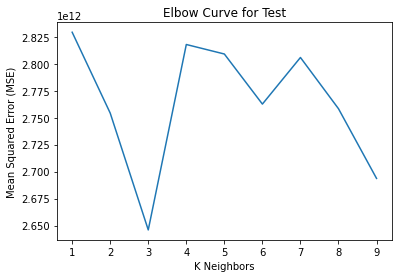

In [12]:
K = range(1, 10)
test = Elbow(K)

#plotting
plt.plot(K,test)
plt.xlabel('K Neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Curve for Test')

**Melakukan improvisasi dengan menerapkan nilai k yang menghasilkan MSE minimum**

In [13]:
new_model  = KNN_Reg(n_neighbors = 3)

# Train model
new_model.fit(train_x, train_y)
acc2 = new_model.score(test_x, test_y)

# Prediction test
print(' Accuracy of new model (%):', acc2*100, '\n',
      'Accuracy of old model (%):', acc1*100, '\n Improvement (%):', (acc2-acc1)*100)

 Accuracy of new model (%): 17.46638513336126 
 Accuracy of old model (%): 11.749687984493729 
 Improvement (%): 5.716697148867533


**Menentukan hasil prediksi harga**

data_jual_rumah = ['luas','kasur','km']

In [14]:
data_harga_rumah = np.array([[8000,4,2]])
pred_old = model.predict(data_harga_rumah)
pred_new = new_model.predict(data_harga_rumah)

print(' Hasil Prediksi harga rumah dengan old model: Rp', pred_old, 'Juta\n',
      'Hasil Prediksi harga rumah dengan new model: Rp', pred_new, 'Juta')

 Hasil Prediksi harga rumah dengan old model: Rp [6020000.] Juta
 Hasil Prediksi harga rumah dengan new model: Rp [5553333.33333333] Juta
